In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file = pd.read_csv('events.csv', low_memory=False)

In [29]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [30]:
file.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
file['time'] = pd.to_datetime(file['timestamp'])
file['month'] = file['time'].dt.month

# Visitas segun canal que las originó, evolucion en el tiempo

In [42]:
visited['month'].value_counts().to_frame()

,month
5,40137
6,22419
4,12650
3,7247
2,2790
1,2135


In [43]:
#agrupo las visitas por mes y calculo en cada uno la cantidad de visitas por cada channel
a = visited.groupby('month').agg({'channel':'value_counts'})

In [44]:
a

channel
month channel          
1     Paid          711
      Direct        618
      Referral      402
      Organic       352
      Social         51
      Email           1
2     Paid         1196
      Direct        819
      Referral      424
      Organic       310
      Social         38
      Email           3
3     Paid         3354
      Direct       1861
      Referral     1095
      Organic       796
      Social        124
      Email          17
4     Paid         5606
      Direct       3548
      Referral     1940
      Organic      1504
      Social         39
      Email          12
      Unknown         1
5     Paid        20632
      Direct       8214
      Organic      5770
      Referral     5211
      Social        267
      Email          35
      Unknown         8
6     Paid        12694
      Organic      3616
      Direct       3462
      Referral     2312
      Social        327
      Email           8

In [45]:
#unstack para el index asi me quedan como columnas mas lindo
forgraph = a.unstack().head(5) #me quedo hasta mayo porque junio tiene solo la mitad y
                                #obviamente va a tener menos visitas

In [46]:
forgraph

channel                                               
channel  Direct Email Organic     Paid Referral Social Unknown
month                                                         
1         618.0   1.0   352.0    711.0    402.0   51.0     NaN
2         819.0   3.0   310.0   1196.0    424.0   38.0     NaN
3        1861.0  17.0   796.0   3354.0   1095.0  124.0     NaN
4        3548.0  12.0  1504.0   5606.0   1940.0   39.0     1.0
5        8214.0  35.0  5770.0  20632.0   5211.0  267.0     8.0

In [47]:
#dropeo el unknown que es poco significativo
sinunknown = forgraph.drop('Unknown',axis=1,level=1)

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 14400x14400 with 0 Axes>

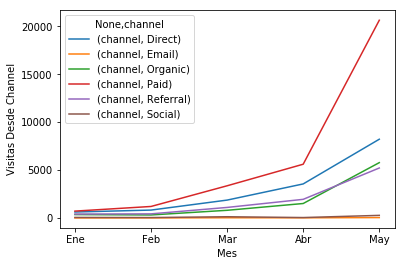

In [48]:
plt.figure(figsize = (200,200))
g=sinunknown.plot()
g.set_xticks(ticks=[1,2,3,4,5])                    # esto es para renombrar los valores del eje x porque 
g.set_xticklabels(['Ene','Feb','Mar','Abr','May']) # sino pone los meses como floats (re cualquiera mal)
g.set_xlabel('Mes')
g.set_ylabel('Visitas Desde Channel')
print(g)